<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 
    20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction To Data Science <br> 📌 FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

## Import

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from src.visualization_module.visualize import Visualize
from src.models_module.predict_model import *
from src.models_module.train_model import *
from models.model import *
import numpy as np

## Data Preparation

In [4]:
data = pd.read_csv('/University/INTRO_2_DS/Final_Project/data/processed/preproces_data.csv')
data

,Giá,Diện tích,Số phòng ngủ,Số toilet,Địa chỉ nhà,Ngày đăng tin,Ngày hết hạn,Mã tin,Quận,Đường,Lượt xem
0,6.5,14.0,0,0,"Dự án The Prince Residence, Đường Nguyễn Văn T...",2023-06-23,2023-07-08,9122,Quận Phú Nhuận,Đường Nguyễn Văn Trỗi,35
1,8.0,68.0,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8478,Quận 7,Đường Đào Trí,74
2,1.3,30.0,0,0,"Đường D5, Phường 25, Bình Thạnh, Hồ Chí Minh",2023-08-07,2023-08-22,11591,Quận Bình Thạnh,Đường D5,88
3,10.0,80.0,2,2,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Hồ Chí Minh",2023-06-16,2023-07-01,8580,Quận 8,Đường Tạ Quang Bửu,48
4,35.0,120.0,5,4,"178A Đường Phan Đăng Lưu, Phường 3, Phú Nhuận,...",2023-03-16,2023-03-31,4467,Quận Phú Nhuận,Đường Phan Đăng Lưu,30
...,...,...,...,...,...,...,...,...,...,...,...
13284,22.0,76.0,5,4,"128A Đường Bành Văn Trân, Phường 7, Tân Bình, ...",2023-05-17,2023-06-01,6623,Quận Tân Bình,Đường Bành Văn Trân,57
13285,8.0,66.0,2,2,"Dự án Q7 Saigon Riverside, Đường Đào Trí, Phườ...",2023-06-16,2023-07-01,8479,Quận 7,Đường Đào Trí,77
13286,11.0,125.0,0,0,"Đường Thạnh Xuân 25, Phường Thạnh Xuân, Quận 1...",2023-07-17,2023-08-01,10408,Quận 12,Đường Thạnh Xuân 25,72
13287,16.0,300.0,0,0,"Đường Nguyễn Ảnh Thủ, Phường Hiệp Thành, Quận ...",2023-08-25,2023-09-09,12585,Quận 12,Đường Nguyễn Ảnh Thủ,66


## Check Data Type

In [6]:
data.dtypes

Giá              float64
Diện tích        float64
Số phòng ngủ       int64
Số toilet          int64
Địa chỉ nhà       object
Ngày đăng tin     object
Ngày hết hạn      object
Mã tin             int64
Quận              object
Đường             object
Lượt xem           int64
dtype: object

## Feature Engineering

- Chuyển dữ liệu về kiểu phù hợp cho model

In [7]:
label_encoder = LabelEncoder()
for i in data.columns:
    if type(data[i][0]) == str:
        data[i] = label_encoder.fit_transform(data[i])
        
X = data.drop(['Giá', 'Ngày đăng tin', 'Ngày hết hạn', 'Mã tin', 'Lượt xem', 'Địa chỉ nhà'], axis = 1)
y = data['Giá']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [8]:
X_train

,Diện tích,Số phòng ngủ,Số toilet,Quận,Đường
331,69.0,2,2,15,561
11036,195.0,4,3,19,556
13186,840.0,6,10,5,783
7780,176.0,0,0,9,396
6132,70.0,5,5,19,789
...,...,...,...,...,...
3116,135.0,0,0,19,556
12442,200.0,3,4,19,612
11110,96.0,0,3,15,561
4558,90.0,4,2,16,966


## Prediction

- Dự đoán trên từng loại model

In [5]:
y_pred = Linear_Regression(X_test, X_train, y_train)

In [6]:
y_pred_1 = Random_Forest(X_test, X_train, y_train)

In [7]:
y_pred_2 = Decision_Tree(X_test, X_train, y_train)

In [8]:
y_pred_3 = Gradient_Boosting(X_test, X_train, y_train)

In [5]:
y_pred_4 = XGBoost(X_test, X_train, y_train)

## Evaluation

- Các đánh giá mô hình dựa trên nhiều công thức

In [10]:
rmse, mae, evs, r2 = Evaluation(y_test, y_pred)

print('Linear Regression')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'Explained Variance Score: {evs}')
print(f'R-Squared: {r2}')

Linear Regression
MAE: 14.721578216028519
RMSE: 25.665260838433717
Explained Variance Score: 0.010915671024219198
R-Squared: 0.0108469392343723


In [11]:
rmse_1, mae_1, evs_1, r2_1 = Evaluation(y_test, y_pred_1)

print('Random Forest')
print(f'MAE: {mae_1}')
print(f'RMSE: {rmse_1}')
print(f'Explained Variance Score: {evs_1}')
print(f'R-Squared: {r2_1}')

Random Forest
MAE: 10.83056767405903
RMSE: 18.73405158171364
Explained Variance Score: 0.47313424114309
R-Squared: 0.4729697323255453


In [12]:
rmse_2, mae_2, evs_2, r2_2 = Evaluation(y_test, y_pred_2)

print('Decision Tree')
print(f'MAE: {mae_2}')
print(f'RMSE: {rmse_2}')
print(f'Explained Variance Score: {evs_2}')
print(f'R-Squared: {r2_2}')

Decision Tree
MAE: 11.909456687363686
RMSE: 20.063993867706284
Explained Variance Score: 0.3958331301662428
R-Squared: 0.39548524272512464


In [13]:
rmse_3, mae_3, evs_3, r2_3 = Evaluation(y_test, y_pred_3)

print('Gradient Boosting')
print(f'MAE: {mae_3}')
print(f'RMSE: {rmse_3}')
print(f'Explained Variance Score: {evs_3}')
print(f'R-Squared: {r2_3}')

Gradient Boosting
MAE: 10.817802163471615
RMSE: 18.734432183306755
Explained Variance Score: 0.47352677976501545
R-Squared: 0.47294831778035695


In [14]:
rmse_4, mae_4, evs_4, r2_4 = Evaluation(y_test, y_pred_4)

print('XGBoost')
print(f'MAE: {mae_4}')
print(f'RMSE: {rmse_4}')
print(f'Explained Variance Score: {evs_4}')
print(f'R-Squared: {r2_4}')

XGBoost
MAE: 10.41003445482894
RMSE: 18.290014339583774
Explained Variance Score: 0.497941612651041
R-Squared: 0.497657148683155


## Visualize

## Linear Regression

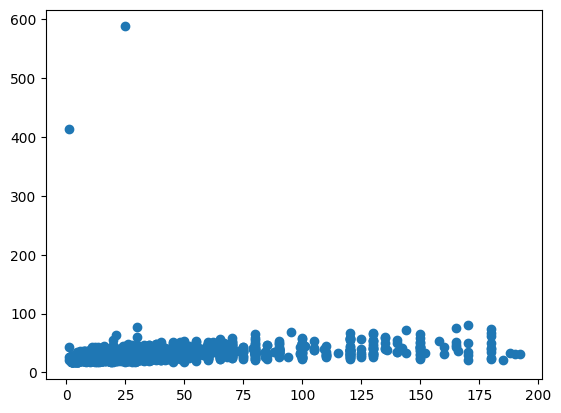

In [16]:
Visualize(y_test, y_pred)

## Random Forest

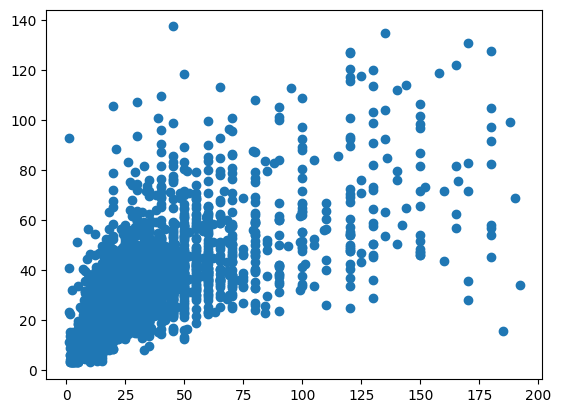

In [17]:
Visualize(y_test, y_pred_1)

## Decision Tree

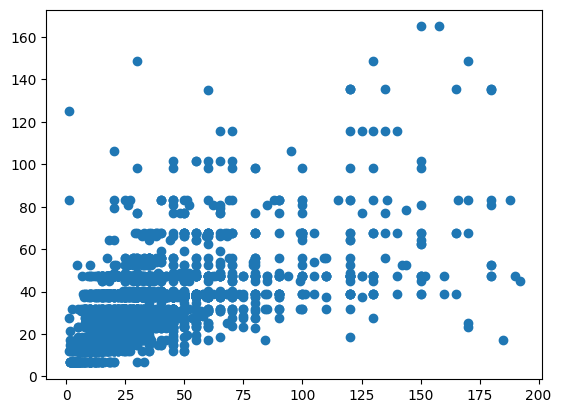

In [18]:
Visualize(y_test, y_pred_2)

## Gradient Boosting

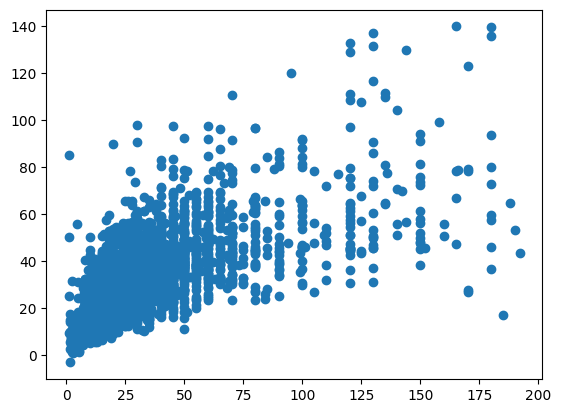

In [19]:
Visualize(y_test, y_pred_3)

## XGBoost

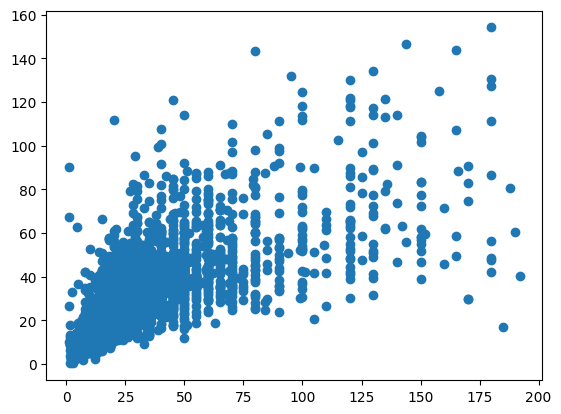

In [20]:
Visualize(y_test, y_pred_4)

## Result Analysis

In [15]:
list_r2 = {'Linear Regression': r2,
           'Random Forest': r2_1,
           'Decision Tree': r2_2,
           'Gradient Boosting': r2_3,
           'XGBoost': r2_4}

sort_list = sorted(list_r2.items(), key = lambda x:x[1], reverse = True)
sort_list

[('XGBoost', 0.497657148683155),
 ('Random Forest', 0.4729697323255453),
 ('Gradient Boosting', 0.47294831778035695),
 ('Decision Tree', 0.39548524272512464),
 ('Linear Regression', 0.0108469392343723)]

- Dựa vào R-Squared ta có thể thấy mô hình tốt nhất là XGBoost

## Deploy Model

- Tạo file pkl và lưu trong thư mục models

In [ ]:
Make_file_pkl(XGBoost_train(X_train, y_train))

- Sử dụng flask để deploy model trên web

In [19]:
%%cmd
python ../models/app.py

Microsoft Windows [Version 10.0.22621.2861]
(c) Microsoft Corporation. All rights reserved.

(venv) d:\University\INTRO_2_DS\Final_Project\notebooks>python ../models/app.py


 * Serving Flask app 'app'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 145-615-569
127.0.0.1 - - [06/Jan/2024 00:36:23] "GET / HTTP/1.1" 200 -
